# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [2]:
df = pd.read_csv('data/temps.csv')
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [5]:
sorted(df['week'].unique())

['Fri', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed']

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['week_int'] = le.fit_transform(df['week'])
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,5
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,6
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,4
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,0


In [7]:
pd.get_dummies(df['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
343,0,0,0,0,0,1,0
344,0,0,0,0,0,0,1
345,0,0,0,0,1,0,0
346,1,0,0,0,0,0,0


In [8]:
my_week = {
    "Mon":1,
    "Tues":2,
    "Wed":3,
    "Thurs":4,
    "Fri":5,
    "Sat":6,
    "Sun":7
}
df['week_int'] = df['week'].replace(my_week)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2


In [9]:
df['autumn'] = np.where(df['month'].isin([10,11,12]), 1, 0)
df['winter'] = np.where(df['month'].isin([1,2,3]), 1, 0)
df['spring'] = np.where(df['month'].isin([4,5,6]), 1, 0)
df['summer'] = np.where(df['month'].isin([7,8,9]), 1, 0)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0


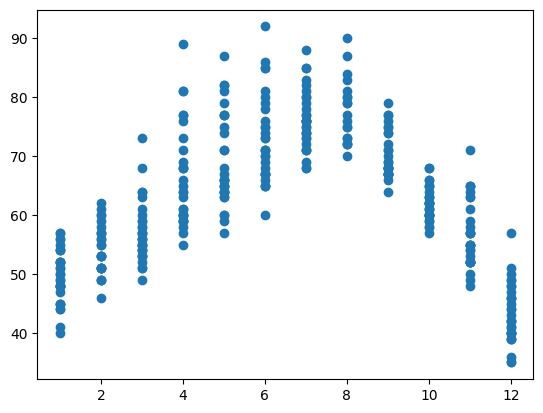

In [10]:
plt.scatter(df['month'], df['actual'])

In [11]:
df[['month','actual']].corr()

,month,actual
month,1.000000,0.004529
actual,0.004529,1.000000


In [12]:
my_month = {
    10:1,
    11:2,
    12:3,
    1:4,
    2:5,
    3:6,
    4:7,
    5:8,
    6:9,
    7:10,
    8:11,
    9:12
}
df['self_month'] = df['month'].replace(my_month)
# df.head()
print(df[['self_month','actual']].corr())

            self_month  actual
self_month      1.0000  0.6811
actual          0.6811  1.0000


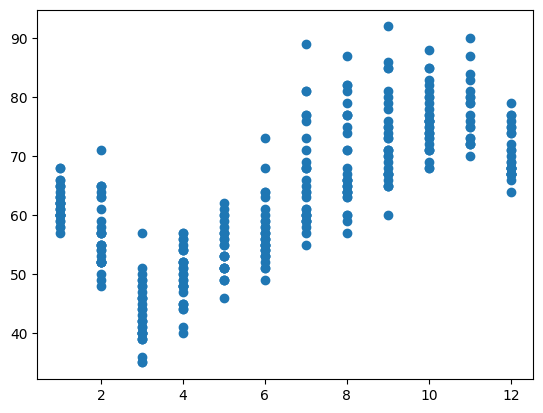

In [13]:
plt.scatter(df['self_month'], df['actual'])

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_3720\3823281401.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

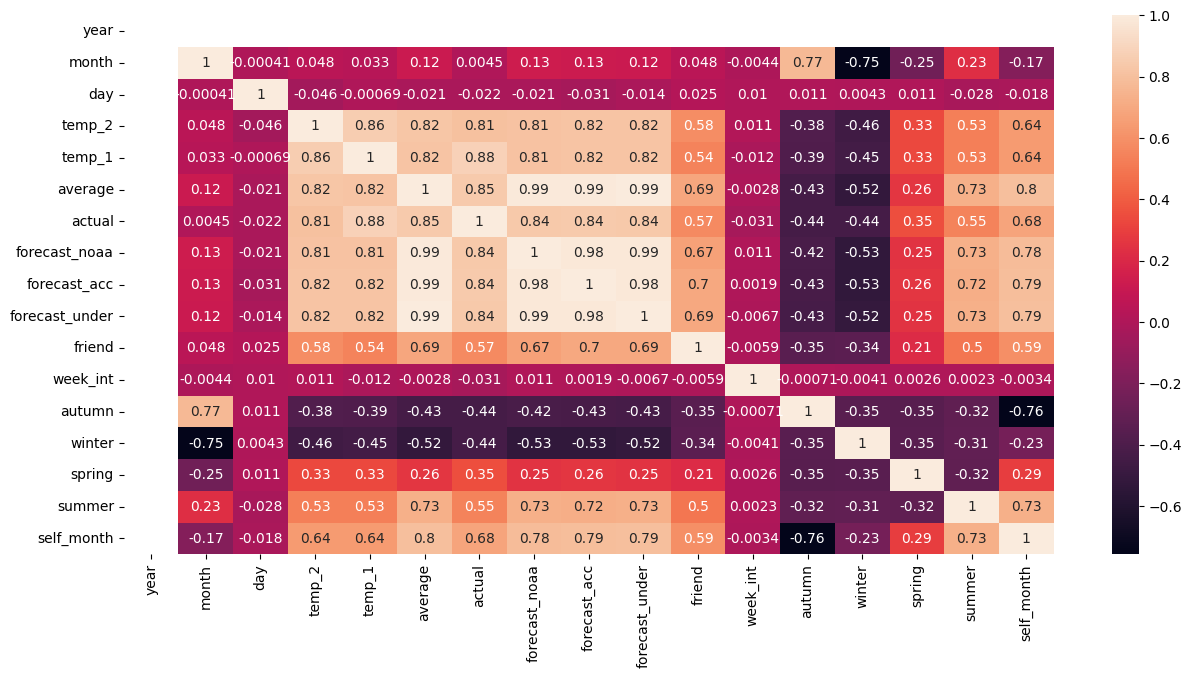

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

### 3. Selecciona variables y divide en train y test

In [15]:
X = df[['temp_2', 'temp_1', 'average', 'self_month']]
y = df['actual']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 4)
(70, 4)
(278,)
(70,)


### 4. Entrena el modelo


In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [20]:
dtr.score(X_train, y_train)

1.0

In [21]:
dtr.score(X_test, y_test)

0.692713614157987

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [22]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_pred = dtr.predict(X_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", mean_squared_error(y_test, y_pred)**(1/2))

MAE test 5.114285714285714
MAPE test 0.07953951993350859
MSE test 43.542857142857144
RMSE test 6.598701170901524


In [24]:
y_pred = dtr.predict(X_train)

print("MAE train", mean_absolute_error(y_train, y_pred))
print("MAPE train", mean_absolute_percentage_error(y_train, y_pred))
print("MSE train", mean_squared_error(y_train, y_pred))
print("RMSE train", mean_squared_error(y_train, y_pred)**(1/2))

MAE train 0.0
MAPE train 0.0
MSE train 0.0
RMSE train 0.0


### 6. Representa el árbol de decisión

In [26]:
from sklearn.tree import plot_tree

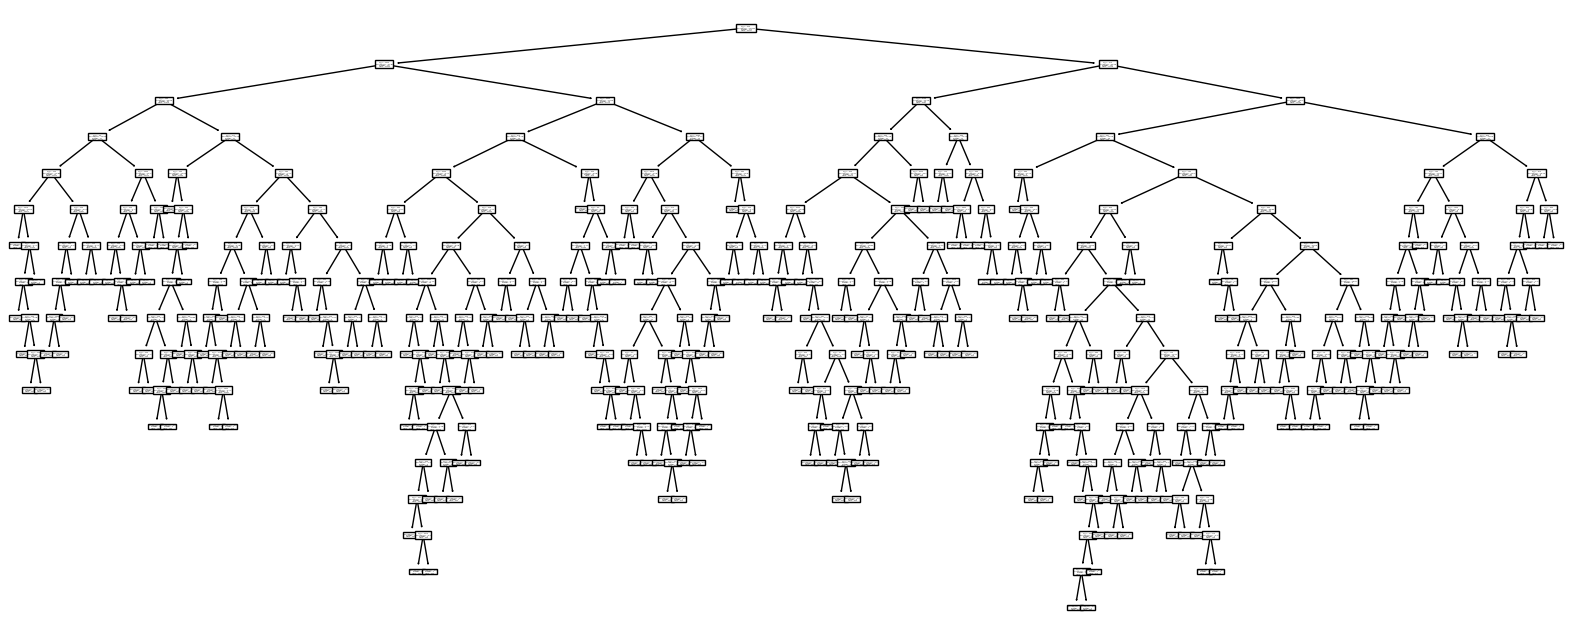

In [28]:
plt.figure(figsize=(20,8))
plot_tree(dtr);

In [30]:
X.columns

Index(['temp_2', 'temp_1', 'average', 'self_month'], dtype='object')

In [29]:
dtr.feature_importances_

array([0.04664031, 0.74922914, 0.19377047, 0.01036008])

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [31]:
dtr_2 = DecisionTreeRegressor(max_depth=3)
dtr_2.fit(X_train, y_train)

print("R2 score train", dtr_2.score(X_train, y_train))
print("R2 score test", dtr_2.score(X_test, y_test))

R2 score train 0.8411822739561527
R2 score test 0.7968217774158459


### 8. Vuelve a evaluar tu modelo

In [33]:
y_pred = dtr_2.predict(X_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", mean_squared_error(y_test, y_pred)**(1/2))

y_pred = dtr_2.predict(X_train)

print("\nMAE train", mean_absolute_error(y_train, y_pred))
print("MAPE train", mean_absolute_percentage_error(y_train, y_pred))
print("MSE train", mean_squared_error(y_train, y_pred))
print("RMSE train", mean_squared_error(y_train, y_pred)**(1/2))

MAE test 4.249708604691008
MAPE test 0.06498613945235272
MSE test 28.790602929834947
RMSE test 5.365687554250149

MAE train 3.5468670720959294
MAPE train 0.05715251618067225
MSE train 21.78485223202098
RMSE train 4.667424582360274


### 9. Vuelve a representar su árbol

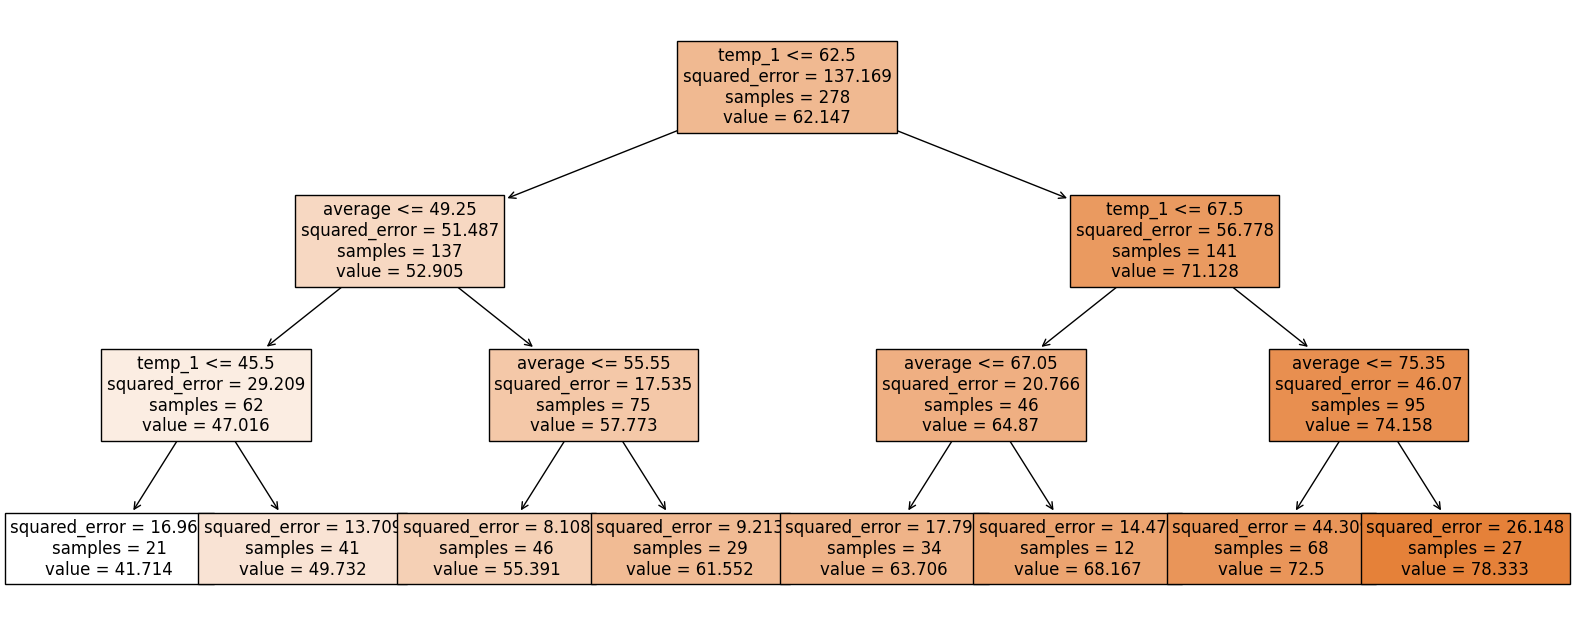

In [37]:
plt.figure(figsize=(20,8))
plot_tree(dtr_2, fontsize=12, feature_names=X_train.columns, filled=True);

In [38]:
dtr_2.feature_importances_

array([0.        , 0.83050731, 0.16949269, 0.        ])

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [40]:
from sklearn.model_selection import GridSearchCV

In [51]:
model = DecisionTreeRegressor()

parameters = {
    "max_depth" : np.arange(2,8),
    "min_samples_leaf": [5,10,15]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_absolute_error', verbose=2)

In [52]:
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_leaf=15; total time=   0.0s
[CV] END ...................max_depth=2, min_sam

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': [5, 10, 15]},
             scoring='neg_mean_absolute_error', verbose=2)

In [53]:
print(dtr_gs.best_params_)
print(dtr_gs.best_score_)
print(dtr_gs.best_estimator_)

{'max_depth': 4, 'min_samples_leaf': 5}
-3.8832099251292744
DecisionTreeRegressor(max_depth=4, min_samples_leaf=5)


In [54]:
y_pred = dtr_gs.best_estimator_.predict(X_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", mean_squared_error(y_test, y_pred)**(1/2))

MAE test 4.125145993414246
MAPE test 0.06329446685409489
MSE test 28.059200964955796
RMSE test 5.29709363377275


In [56]:
from sklearn.model_selection import cross_val_score

results_cv = cross_val_score(dtr_gs.best_estimator_, X, y, cv=10, scoring='neg_mean_absolute_error')
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[-3.49789322 -3.21591444 -4.79952085 -6.66806227 -4.60227743 -3.99959184
 -4.51938776 -3.14646554 -3.66901192 -4.87091503]
-4.2989040298342704
0.9980142350469398


In [58]:
y_pred = dtr.predict(X_test)
print("MAE 1º Modelo", mean_absolute_error(y_test, y_pred))

y_pred = dtr_2.predict(X_test)
print("\nMAE 2º Modelo", mean_absolute_error(y_test, y_pred))

y_pred = dtr_gs.best_estimator_.predict(X_test)
print("\nMAE 3º Modelo", mean_absolute_error(y_test, y_pred))

MAE 1º Modelo 5.114285714285714

MAE 2º Modelo 4.249708604691008

MAE 3º Modelo 4.125145993414246


In [60]:
final_model = dtr_gs.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print("\nMAE Modelo final", mean_absolute_error(y_test, y_pred))


MAE Modelo final 4.125145993414246


### 11. Obten el `feature_importances` de cada variable en el último modelo

In [59]:
X.columns

Index(['temp_2', 'temp_1', 'average', 'self_month'], dtype='object')

In [61]:
final_model.feature_importances_

array([0.00227794, 0.81385262, 0.18101591, 0.00285353])

<Axes: >

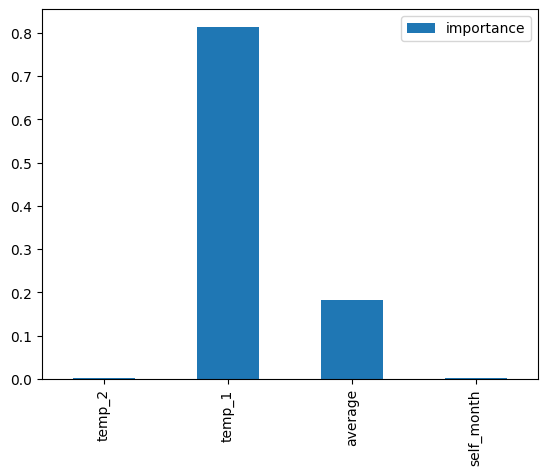

In [66]:
pd.DataFrame({'importance':final_model.feature_importances_}, index=X.columns).plot(kind='bar')

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
df['target_c'] = np.where(df['actual']>59, 1, 0)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,self_month,target_c
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4,0


In [69]:
df['target_c'].value_counts(normalize=True)

1    0.586207
0    0.413793
Name: target_c, dtype: float64

In [70]:
X = df[['temp_1', 'average']]
y = df['target_c']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 2)
(70, 2)
(278,)
(70,)


In [89]:
model = DecisionTreeClassifier()

parameters = {
    "max_depth" : np.arange(2,8),
    "min_samples_leaf": [5,10,15]
}

dtc_gs = GridSearchCV(model, parameters, cv=5, scoring='accuracy', verbose=2)
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_leaf=15; total time=   0.0s
[CV] END ...................max_depth=2, min_sam

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': [5, 10, 15]},
             scoring='accuracy', verbose=2)

In [72]:
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)
print(dtc_gs.best_estimator_)

{'max_depth': 3, 'min_samples_leaf': 5}
0.9027922077922078
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)


In [78]:
final_model_c = dtc_gs.best_estimator_
final_model_c.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [74]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix

In [80]:
y_pred = final_model_c.predict(X_test)

print("Accuracy", final_model_c.score(X_test, y_test))
print("AUC", roc_auc_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
print("Confusion matrix \n", confusion_matrix(y_test, y_pred))

Accuracy 0.9
AUC 0.9047202797202797
Recall 0.8863636363636364
Precision 0.9512195121951219
F1 Score 0.9176470588235294
Confusion matrix 
 [[24  2]
 [ 5 39]]


### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model = RandomForestClassifier()

parameters = {
    "max_depth" : np.arange(2,8),
    "min_samples_leaf": [5,10,15]
}

dtc_gs = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
dtc_gs.fit(X_train, y_train)

print(dtc_gs.best_params_)
print(dtc_gs.best_score_)
print(dtc_gs.best_estimator_)

final_model_c = dtc_gs.best_estimator_
final_model_c.fit(X_train, y_train)

y_pred = final_model_c.predict(X_test)

print("Accuracy", final_model_c.score(X_test, y_test))
print("AUC", roc_auc_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
print("Confusion matrix \n", confusion_matrix(y_test, y_pred))

{'max_depth': 6, 'min_samples_leaf': 15}
0.9242857142857142
RandomForestClassifier(max_depth=6, min_samples_leaf=15)
Accuracy 0.8714285714285714
AUC 0.8741258741258741
Recall 0.8636363636363636
Precision 0.926829268292683
F1 Score 0.8941176470588236
Confusion matrix 
 [[23  3]
 [ 6 38]]
